# Estudo guiado - Análise espectral 


<a href="https://colab.research.google.com/github/borismarin/sample-data/blob/master/neuro-comp/analise_espectral_eeg.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>


## Introdução 

O objetivo deste estudo guiado é dar uma introdução a um importante método quantitativo em neurociência: a análise espectral. Esta técnica é largamente utilizada em estudos sobre mecanismos fisiológicos e cognitivos. 

O início dos nossos estudos baseia-se em ferramentas matemáticas para decompor sinais complexos, como aqueles obtidos de registros da atividade elétrica do encéfalo humano, via a técnica de eletroencefalografia (EEG). 

A figura abaixo mostra um sinal de EEG registrado em um paciente durante uma crise epiléptica curta. Cada curva preta representa ao sinal registrado em um eletrodo posicionado em um local diferente sobre o crânio. Para cada curva, representa-se no eixo vertical o potencial elétrico registrado e no eixo horizontal o tempo. Note que após o início do registro o sinal muda de característica (amplitude e frequência), indicando que houve alguma alteração no funcionamento cerebral. Esta variação corresponde a uma crise epiléptica, o que demonstra que podemos captar alterações importantes do funcionamento do cérebro (até mesmo para a saúde humana) através da análise de sinais neurais. 

![Hoppe M., Wennberg R., Tai P., Pohlmann-Eden B. (2009) EEG in Epilepsy. In: Lozano A.M., Gildenberg P.L., Tasker R.R. (eds) Textbook of Stereotactic and Functional Neurosurgery. Springer, Berlin, Heidelberg](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-540-69960-6_153/MediaObjects/978-3-540-69960-6_153_Fig3_HTML.jpg)
**Figura 1**: Extraído de Hoppe M., Wennberg R., Tai P., Pohlmann-Eden B. (2009) EEG in Epilepsy. In: Lozano A.M., Gildenberg P.L., Tasker R.R. (eds) Textbook of Stereotactic and Functional Neurosurgery. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-540-69960-6_153.


Como a maior parte dos sinais registrados por humanos − exemplos estão por toda parte como luz solar, batimentos cardíacos, marés − os sinais neurais são oscilatórios. Isso significa que orbitam em torno de um ponto médio (representado por uma linha horizontal imaginária no gráfico). Esta característica nos permite entender estes sinais a partir de funções oscilatórias mais simples e conhecidas, como senos ou cossenos. 

Assim, o objetivo deste estudo guiado fornecer a vocês os primeiros passos para entender o processo de descrever um sinal oscilatório em função de suas frequências. 

Agradecimento: Este guia é baseado em material criado por MB Reyes.

## Parte 1 - Funções seno e cosseno são os tijolos para construir outras funções

### Plotando uma função seno e cosseno 

Vamos começar a nossa exploração por algo bastante simples, as funções seno e cosseno e os seus gráficos. Para isso, vamos criar um lista contendo valores de tempo de zero a 5 segundos e vamos plotar todas as funções nesse intervalo. Vamos imaginar que nossos "sinais" são medidos a cada 10 ms (milissegundos) = 0.01 s. Este valor será importante no futuro. 




In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Parâmetros to sinal a ser analisado (eixo do tempo)
dt = 0.01                  # vamos pensar em segundos (10 milissegundos)
tmax = 5                  # duração total do sinal
t = np.arange(0, tmax, dt)   # cria os valores de tempo para plotar a função de interesse


Agora vamos gerar as funções seno e cosseno bem como seus gráficos. Altere os valores de $A$, $f$ e verifique se entende o efeito que eles produzem no gráfico. Veja se entende se também a razão de introduzirmos o $2\pi$ na fórmula, que parece um inconveniente agora, mas que ajuda a ajustar a unidade de medida da frequência $f$ para Hertz, ou oscilações por segundo, ao invés de radianos por segundo. As funções são: 

$f(t) = A\sin(2\pi f t)$

$f(t) = A\cos(2\pi f t)$

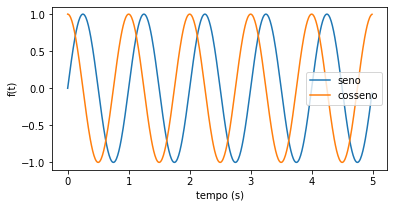

In [43]:
f = 1     # frequência em Hertz
A = 1     # amplitude em unidades arbitrárias (nesse momento)

seno    = A * np.sin(2 * np.pi * f * t)
cosseno = A * np.cos(2 * np.pi * f * t)

# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(t,seno,label='seno')
ax.plot(t,cosseno,label='cosseno')
ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
ax.legend()

### Combinações de funções seno e cosseno

De certa maneira, podemos dizer que as funções seno e cosseno são funções oscilatórias "puras". Em outras palavras, podemos construir outras funções oscilatórias (e até mesmo não oscilatórias) como somas de senos e cossenos.

Para somar duas funções, basta adicionar o valor de cada uma delas para cada instante de tempo; desta forma, o resultado final também é uma função do tempo: 

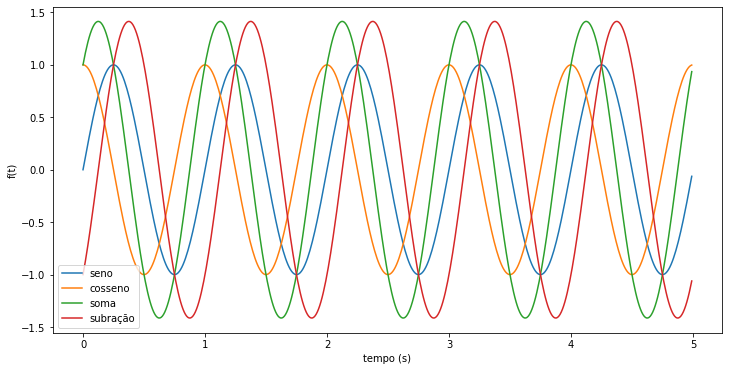

In [44]:
soma = seno + cosseno
subtracao = seno - cosseno

# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(t,seno,label='seno')
ax.plot(t,cosseno,label='cosseno')
ax.plot(t,soma,label='soma')
ax.plot(t,subtracao,label='subração')
ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
l = ax.legend()

Podemos ver alguns resultados inusitados. Aqui vamos calcular as funções seno e cosseno elevadas ao quadrado. Reparem que a soma delas é igual a 1, recuperando a relação trigonométrica: $\sin^2(x) + \cos^2(x) = 1$

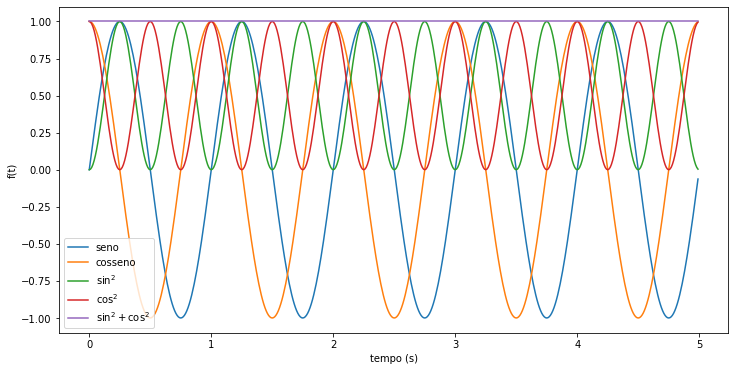

In [45]:
senoq = seno**2      # cada valor da função seno elevado ao quadrado
cosq  = cosseno**2
somaq = senoq + cosq # soma dos quadrados

# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(t,seno,label='seno')
ax.plot(t,cosseno,label='cosseno')
ax.plot(t,senoq,label='$\sin^2$')
ax.plot(t,cosq,label='$\cos^2$')
ax.plot(t,somaq,label='$\sin^2+\cos^2$')
ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
ax.legend()

Se alterarmos as amplitudes e frequências, também podemos ter resultados bastante diversos. Vamos dar um exemplo de somas de senos com amplitudes e frequências diferentes.

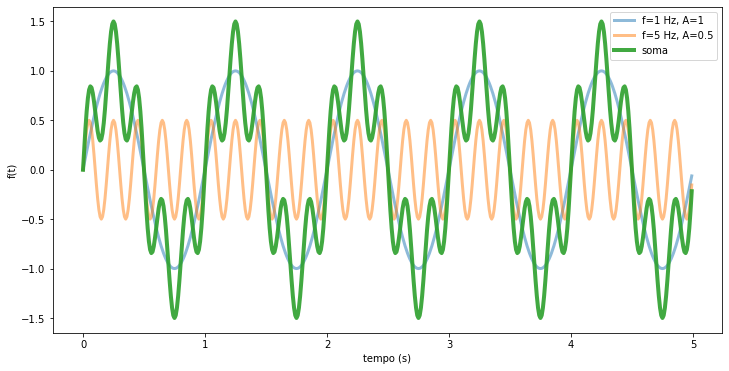

In [46]:
f1 = 1     # frequência em Hertz
A1 = 1     # amplitude em unidades arbitrárias nesse momento 

f2 = 5
A2 = 0.5

fun1 = A1 * np.sin(2 * np.pi * f1 * t)
fun2 = A2 * np.sin(2 * np.pi * f2 * t)
soma =  fun1 + fun2
       

# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(t, fun1, lw=3, alpha = 0.5, label=f'f={f1} Hz, A={A1}')
ax.plot(t, fun2, lw=3, alpha = 0.5, label=f'f={f2} Hz, A={A2}')
ax.plot(t, soma, lw=4, label='soma', alpha=0.9)
ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
l = ax.legend()

### Combinações de muitas senóides podem resultar em formas não intuitivas

Vamos fazer uma soma de várias senoides, com amplitudes e frequências bem específicas para mostrar uma curiosidade.

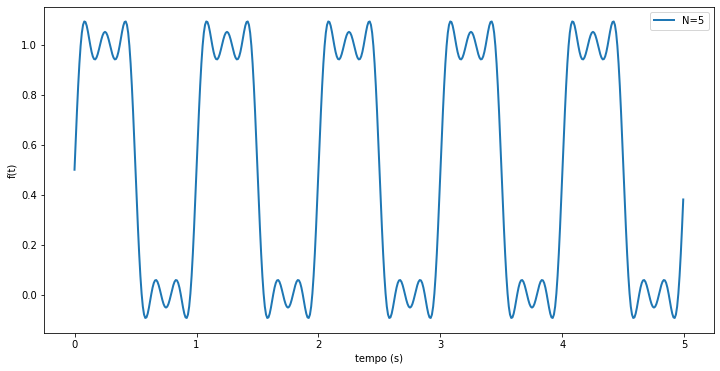

In [47]:
# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

# inicia a variável soma com todos os valores iguais a 1/2
soma = np.ones(shape=np.size(t))/2

# número de senóides
N = 5

# soma as senóides e joga na variável soma
for f in np.arange(1,N+1,2):
    soma += 2/f/np.pi * np.sin(2 * np.pi * f * t)

# plota a função
ax.plot(t,soma,lw=2, label=f'N={N}')

ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
l = ax.legend()

Agora vamos somar mais senóides ainda e mostrar que podemos criar uma função que não tem a cara de uma senóide, mas sim de onda quadrada!

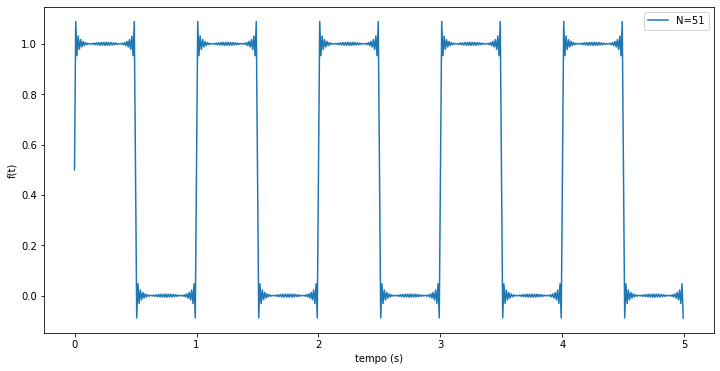

In [48]:
# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

# inicia a variável soma com todos os valores iguais a 1/2
soma = np.ones(shape=np.size(t))/2

# número de senóides
N = 51

# soma as senóides e joga na variável soma
for f in range(1, N + 1, 2):
    soma += 2/f/np.pi * np.sin(2 * np.pi * f * t)

# plota a função
ax.plot(t,soma, label=f'N={N}')

ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
l = ax.legend()

### Conclusão da primeira parte

Nesses primeiros exercícios, nós pudemos observar que as funções seno e cosseno, quando combinadas (somadas) de diversas formas, podem resultar em funções bastante diversas. Em outras palavras, as funções seno e cosseno são como blocos de Lego, com as quais podemos construir formatos muito diferentes do formato do bloco original, ou como pixels em uma tela, que têm o formato quadrado, mas podem formar imagens bastante realistas.

Esta é a base da análise espectral, que iremos abordar mais adiante. Porém, nós  traçaremos o caminho inverso: dada uma função arbitrária − como um sinal de EEG, por exemplo − gostaríamos de saber quais senóides precisariam ser combinadas para formar este sinal. Este é um problema longe de ser trivial e que foi abordado e resolvido por Joseph Fourier (1768 – 1830), um importante matemático francês.

A seguir olharemos em detalhe para o trabalho de Fourier mas, para iniciar esta próxima etapa, é preciso que você esteja bem familiarizado com os conceitos abordados nos exemplos descritos anteriormente. 


### Exercícios resolvidos

1. Adapte o código abaixo para construir a seguinte soma de senóides:

$$
\text{soma} = \frac{\pi}{2}  + \sum\limits_{f=1}^{N} \frac{1}{f} \sin(2\pi f t)
$$

Nesse caso, use N = 51. Lembre-se que o valor de pi vem da biblioteca numpy (nesse caso, importada como np) e portanto pode ser inserido no código com `np.pi`, conforme nos exemplos acima. A parte que precisa ser editada está indicada nos comentários do próprio código.

Verifique se o resultado se assemelha a uma função dente de serra.

Aqui, vale ressaltar mais uma vez que podemos construir funções de formas arbitrárias através da soma de funções oscilatórias puras. 

In [ ]:
# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

# inicia a variável soma com todos os valores iguais a zero
soma = np.zeros(shape=np.size(t)) 

# somando o valor de pi/2
soma = soma + np.pi/2

# número de senóides
N = 51

# soma as senóides e armazena na variável soma
for f in range(1, N+1):

    ################
    # complete o código da linha abaixo
    soma = soma + ???
    ################

# plota a função
ax.plot(t, soma, label=f'N={N}')

ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
ax.legend()

2. Este exercício tem o objetivo de mostrar que, se combinarmos senoidais com frequências muito próximas, podemos gerar funções que não são oscilatórias. Mais para a frente veremos que são necessárias infinitas funções para conseguir efetivamente fazer isso, mas o exercício busca dar um pouco da intuição sobre o problema.

Adapte o código abaixo para construir a seguinte soma de senóides:
$$
\text{soma} = \sum\limits_{f=0}^{f_{max}} \cos(2\pi f t)
$$
onde a soma é feita sobre os seguintes os valores de $f$ pertencentes a $[0,\Delta_f,2\Delta_f,...,N\Delta_f]$ e $\Delta_f$ (variável "deltaf") é um valor (bem pequeno) do incremento de frequência. A ideia do exercício é estudar as somas para valores "pequenos" de $\Delta_f$ e para frequências cada vez mais altas, como se estivéssemos nos aproximando do caso contínuo e infinito. 

Inicie com fmax = 2 e $\Delta_f =0.1$. Repare que a soma parece uma função que apresenta somente um pico. Depois vá aumentando aos poucos (10, 20, ...) e observando o que acontece com a soma. 


In [ ]:
# cria figura com dimensões específicas
fig, ax = plt.subplots(figsize=(12,6))

# inicia a variável soma com todos os valores iguais a 1
soma = np.ones(shape=np.size(t))

deltaf = 0.1            # incremento da frequência a cada passo da somatória

###############################
# Altere o valor abaixo 
fmax   = 2              # frequência máxima das senóides 
###############################

# lista com todas as frequências
frequencies = np.arange(0,fmax,deltaf)

# soma as senóides e joga na variável soma
for f in frequencies:
    soma += np.cos(2 * np.pi * f * (t-2.5))

# plota a função
ax.plot(t,soma,lw=1,label=f'N={N}')

ax.set_xlabel('tempo (s)')
ax.set_ylabel('f(t)')
l = ax.legend()

## Parte 2 - Fazendo o caminho inverso

Na parte anterior da atividade, nós exploramos como somas de senos e cossenos podem gerar funções com formas inusitadas. 

Nesta parte da atividade guiada, vamos tentar fazer o caminho inverso: vamos construir uma operação matemática que transforma uma função qualquer e interpreta quais são as frequências típicas presentes nela. Há inúmera vantagens em realizar  análises deste tipo, que espero que fiquem mais claras ao longo do exercício. Mas, de maneira geral, a análise espectral visa levantar mais informações sobre sinais, informações que não seriam possíveis distinguir a olho nu. 

Uma das técnicas mais utilizadas na análise espectral é a transformada de Fourier. A palavra transformada pode ser intimidadora mas ela não passa de uma função que tranforma outra função. Em outras palavras, nós vamos transformar a nossa função − potencial elétrico medido no tempo, por exemplo − em uma outra função, mas com a variável independente representando frequências ao invés do tempo.  Por isso, costuma-se dizer que a transformada de Fourier "passa" do domínio temporal para o domínio das frequências. 

Para executar esta parte do estudo guiado, você precisa ter entrado em contato com a transformada de Fourier e ter uma intuição geométrica sobre ela − uma vez que não é o nosso objetivo aqui fazer uma descrição matemática formal. Para isso, assista ao vídeo abaixo antes de prosseguir com as atividades. Fique à vontade para buscar outros videos, textos que ajudem você a compreender o tópico.

[Link para o vídeo](https://www.youtube.com/watch?v=spUNpyF58BY)


As funções definidas abaixo têm por objetivo aplicar os conceitos descritos no vídeo.  

### Calculando transformadas de Fourier computacionalmente

In [49]:
# importando os pacotes que serão usados
import numpy as np
import numpy.fft as fft

Inicialmente, vamos construir algumas funções em _Python_ que serão úteis mais adiante.
Como usaremos vários exemplos com sinais que são somas de senóides, vamos criar uma rotina que constrói estas somas. Assim, nossos exemplos ficam mais "limpos" e mais focados nos conceitos do que nas linhas de código.

In [85]:
def gera_senoide_com_ruido(frequencias, t, amplitude_ruido=0.1):
    '''
    Gera um sinal contendo diversas frequências puras.

    Parâmetros: 
    
    frequencias: lista com um número arbitrário de frequências (em Hertz)
    ex: [1,2,4] criará uma função com senóides com frequências 1, 2, e 4 Hz. A 
    função resultante será a soma destas senóides.

    t: lista com os valores da variável independente (tempo). Ex.: t=np.arange(0,10,0.1)

    amplitude_ruido: valor da amplitude do ruído (gaussiano) que será somado ao sinal final
    '''

    # cria lista com zeros do tamanho da lista t
    sinal = np.zeros(len(t))

    # para cada frequência, adiciona uma senoide
    for f in frequencias:
        sinal += np.sin(2 * np.pi * f * t) 

    # adiciona o ruido
    sinal += np.random.normal(size=np.size(t)) * amplitude_ruido

    # faz com que o sinal tenha média zero (subtrai a média)
    sinal -= np.mean(sinal)

    return sinal

Agora, vamos criar uma função que gera um sinal mais "limpo" da transformada de Fourier. Nós usaremos uma implementação do algoritmo _Fast Fourier Transform_ (FFT) disponibilizada pelo numpy, uma vez que nossos sinais são discretos. Mas a ideia permanece a mesma. 

In [51]:
def transforma_sinal(t, sinal, dt):
    '''
    Calcula a transformada de Fourier (discreta) de um sinal. 
    
    Parâmetros:

    t: lista com os valores de tempo (eixo x) para o sinal que queremos transformar

    sinal: lista com os valores da função

    dt : intervalo de tempo para o qual a função foi medida (em segundos).
    ''' 

    # calcula a transformada discreta pelo método mais rápido (FFT)
    F = np.fft.fft(sinal)

    # gera os valores de frequência
    freq = np.fft.fftfreq(t.shape[-1], dt)

    # uma particularidade do FFT é que ele gera resultados "simétricos"
    # com frequências "negativas". Precisamos filtrar somente os
    # índices dos valores positivos  

    # retorna o valor absoluto da transformada, para freqs. positivas
    return freq[freq > 0], np.abs(F[freq > 0])

A função abaixo faz os gráficos dos sinais.

In [86]:
def plota_sinal_transformada(t, sinal, freq, F):

    # cria figura com dimensões específicas
    fig, ax = plt.subplots(2, 1, figsize=(7,4),dpi=100, tight_layout=True, \
                                sharex=False, squeeze= True)

    # primeiro plota o sinal
    ax[0].plot(t, sinal, 'k' ,lw=0.6)
    plt.setp(ax[0], xlabel='tempo (segundos)', ylabel='amplitude (u.a.)')

    # agora plota a frequencia no gráfico debaixo
    ax[1].plot(freq, F,'m', lw=0.6)
    plt.setp(ax[1], xlabel='frequência (Hz)', ylabel='potência espectral')  

    return ax

Vamos redefinir os valores de tempo baseado em uma resolução temporal `dt`.

In [104]:
# Parâmetros to sinal a ser analisado (eixo do tempo)
dt = 0.001                 # vamos pensar em segundos (1 milissegundo)
tmax = 10                  # duração total do sinal
t = np.arange(0, tmax, dt)   # cria os valores de tempo para plotar a função de interesse

### Transformada de Fourier de uma senóide "pura"


(0.0, 50.0)

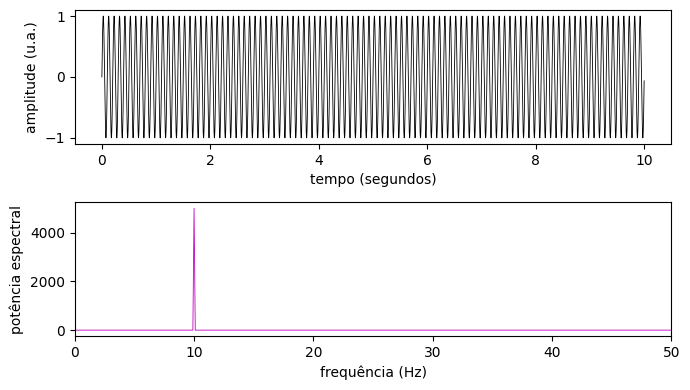

In [105]:
# definindo quanto de ruído é adicionado ao sinal
ampl_ruido = 0

# Lista com frequencias (em Hz)
# Nesse caso vamos usar uma única frequência, assim a lista tem somente um valor
frequencia_senoides = [10]

# gerando um sinal senoidal com ruido
sinal = gera_senoide_com_ruido(frequencia_senoides, t, ampl_ruido)

# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t, sinal, dt)

# plotando todos os graficos
ax = plota_sinal_transformada(t, sinal, freq, F)
ax[1].set_xlim(0, 50)

### Transformada de Fourier de somas de senóides


(0.0, 50.0)

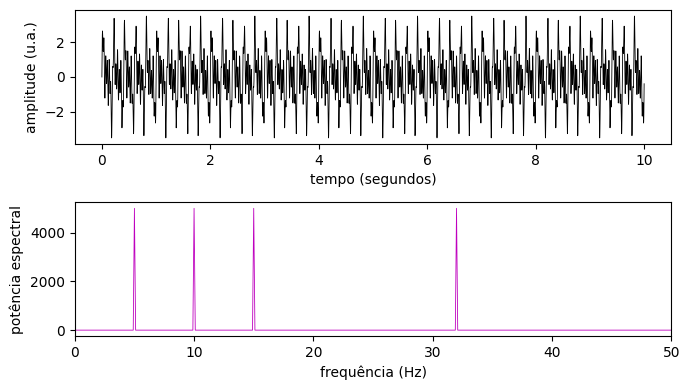

In [106]:
# definindo quanto de ruído é adicionado ao sinal
ampl_ruido = 0

# lista com frequencias (em Hz)
frequencia_senoides = [5,10,15,32]

# gerando um sinal senoidal com ruido
sinal = gera_senoide_com_ruido(frequencia_senoides, t, ampl_ruido)

# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t,sinal,dt)


ax = plota_sinal_transformada(t,sinal,freq,F)
ax[1].set_xlim(0, 50)

### Aumentando o ruído


(0.0, 50.0)

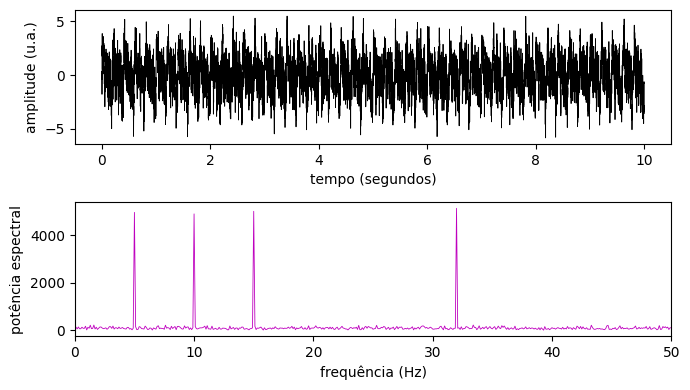

In [107]:
# definindo quanto de ruído é adicionado ao sinal
ampl_ruido = 1

# lista com frequencias (em Hz)
frequencia_senoides = [5,10,15,32]

# gerando um sinal senoidal com ruido
sinal = gera_senoide_com_ruido(frequencia_senoides,t,ampl_ruido)

# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t,sinal,dt)


ax = plota_sinal_transformada(t, sinal, freq, F)
ax[1].set_xlim(0, 50)

### Transformada de ruído


(0.0, 100.0)

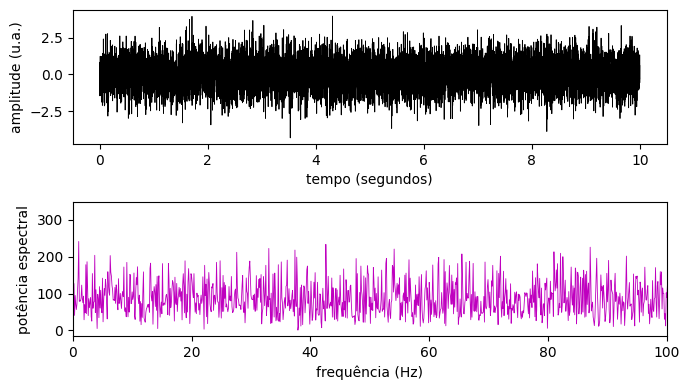

In [108]:
# Gerando um sinal que é puro ruído
sinal = np.random.normal(size=np.size(t))

# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t,sinal,dt)

# plotando os gráficos
ax = plota_sinal_transformada(t,sinal,freq,F)
ax[1].set_xlim(0, 100)

### E se o sinal "mudar" repentinamente?
#### Mudança abrupta da frequência

Nesse exemplo, vamos construir uma função que é composta por duas senóides puras (com um pequeno ruído). Mas nesse caso, ao invés de somar os sinais, vamos construir um sinal que nos primeiros 5 segundos tem uma frequência, e nos 5 segundos finais, outra. Vejam que o resultado mostra dois picos, indicando que as frequências estão presentes. No entanto perdemos a informação de "quando" elas estão presentes, pois passamos do domínio do tempo para o domínio das frequências. Se os trechos inicial e final fossem trocados de ordem, o resultado seria exatamente o mesmo. Reflita sobre esse resultado e o impacto disso na análise de séries que mudam com o tempo.

(0.0, 50.0)

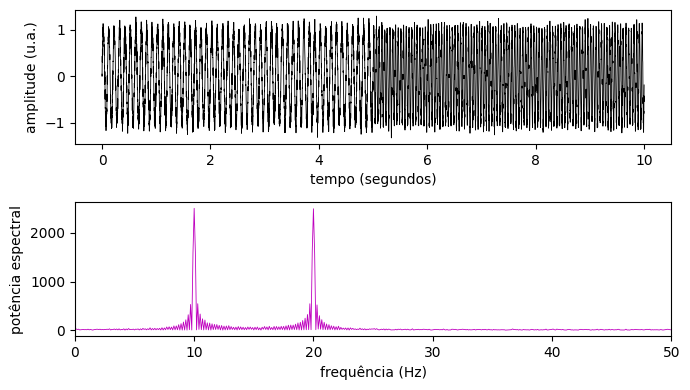

In [92]:
# definindo quanto de ruído é adicionado ao sinal
ampl_ruido = 0.1

# gerando dois sinais, cada um com uma frequência diferente
sinal1 = gera_senoide_com_ruido([10], t, ampl_ruido)
sinal2 = gera_senoide_com_ruido([20], t, ampl_ruido)

N = len(sinal1)//2  # a barra dupla representa divisão inteira
sinal = np.concatenate([sinal1[0:N], sinal2[-N:]])


# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t, sinal, dt)


ax = plota_sinal_transformada(t, sinal, freq, F)
ax[1].set_xlim(0, 50)

### E se o sinal mudar suavemente?
#### Mudança suave da frequência


(0.0, 100.0)

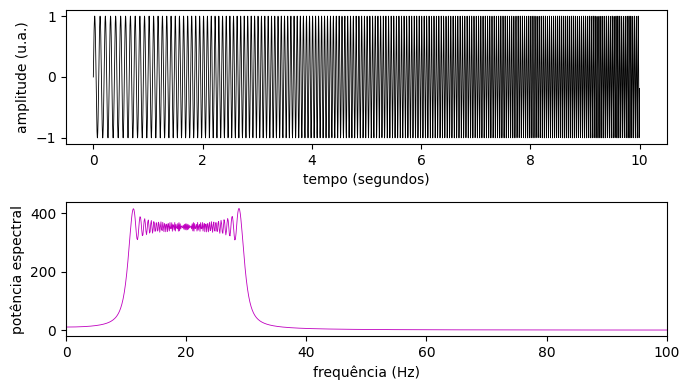

In [93]:
# definindo quanto de ruído é adicionado ao sinal
amplitude_ruido = 0.1

fmin = 10  # frequencia inicial do sinal (senoidal)
fmax = 20  # frequencia final do sinal (senoidal)

# como o tempo vai de 0 a 10, só precisamos adicionar 10 ao valor do tempo, 
# e este será o valor da frequência naquele instante

framp = t + 10

# agora geramos uma senóide com a frequência variável
sinal = np.sin(2 * np.pi * framp * t)


# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t, sinal, dt)


ax = plota_sinal_transformada(t, sinal, freq, F)
ax[1].set_xlim(0, 100)

O exemplo acima mostra um sinal para o qual a transformada não possui picos isolados, mas sim uma "banda" de frequências, ou seja, um contínuo de valores presentes no sinal original. Repare que, da forma como foi construído o sinal, não há sequer um ciclo para o qual a frequência seja constante. A transformada é capaz de mostrar que, por exemplo, em algum instante de tempo o sinal teve uma frequência próxima de 20 Hz.

#### Mudança suave da frequência e da amplitute



(0.0, 100.0)

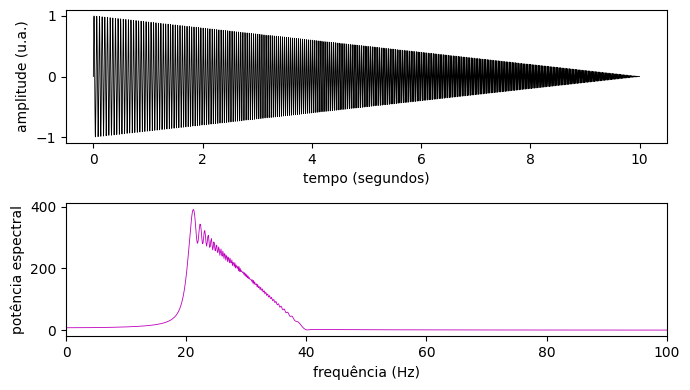

In [94]:
# Vamos construir um sinal em que tanto a frequência como a amplitude
# mudam com o tempo. Começamos por definir as frequências máxima e
# mínima
fmin = 20  # frequencia inicial do sinal (senoidal)
fmax = 30  # frequencia final do sinal (senoidal)

# Calculando explicitamente a dependência de f e A com o tempo (rampas) 
framp = fmin + (fmax - fmin) / tmax * t 
aramp = 1 - t * 0.1

# agora geramos uma senoide com a frequencia variavel
sinal = aramp * np.sin(2 * np.pi * framp * t)


# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t,sinal,dt)


ax = plota_sinal_transformada(t,sinal,freq,F)
ax[1].set_xlim(0, 100)

Na figura acima repare que a frequência vai aumentando com o tempo, enquanto a amplitude dimiui. Assim, a transformada mostra um descrescimento da potência do sinal com a frequência, ou seja, que sinais com maior frequência têm menor potência (ou contribuição para o sinal). 

### Exercícios


1. No exemplo abaixo, a função que foi criada é periódica, mas não é senoidal. Dado o que você aprendeu no Parte 1 deste tutorial, explique o resultado obtido.

(0.0, 50.0)

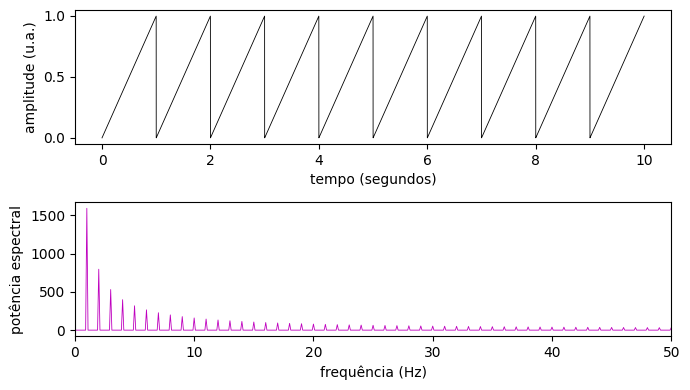

In [97]:
# Vamos construir um sinal periódico mas não senoidal

# Função dente de serra (usando a função mod)
# A frequência básica dessa função é definida por fbasica (Hz)
fbasica = 1    # frequencia em Hz
sinal = np.mod(t, fbasica)

# Gerando a transformada de Fourier (discreta) do sinal
freq, F = transforma_sinal(t, sinal, dt)


ax = plota_sinal_transformada(t, sinal, freq, F)
ax[1].set_xlim(0, 50)

## Parte 3 - Análise espectral em dados experimentais

Até o momento, nós aplicamos a transformada de Fourier a sinais conhecidos, criados por nós mesmos. Mas, ainda que tenhamos adicionado ruído para simular situações mais cotidianas, a verdade é que os registros fisiológicos são muito mais complexos e variáveis do que sinais que conseguimos construir com funções matemáticas "simples". Diversas razões contribuem para isso, mas entre elas podemos destacar que:

1.   Sinais reais refletem o funcionamento de um organismo vivo, que por si só já passa por mudanças internas de estado. Pense por exemplo como nossos batimentos cardíacos mudam, como podemos desviar nossa atenção para coisas diferentes, etc.
2.   Sinais reais estão sujeitos a perturbações tanto fisiológicas (piscada de um olho, por exemplo), como externas, como por exemplo oscilações da rede elétrica.

Pelas razões acima, quando lidamos com sinais reais, precisamos de métodos que nos ajudem a separar as variações que são só ruído das que resultam de manipulações experimentais. Há uma extensa literatura acerca de filtros de sinais e análise espectral em dados reais. Nessa atividade, vamos aplicar o método de Welch, publicado originalmente em 1967 [1]. 

A ideia é que sinais reais precisam ser amostrados em diferentes momentos para depois calcularmos uma média da potência espectral. Este processo faz com que a variabilidade que é decorrente de ruído (ou seja, tem variações aleatórias) desapareça quando fazemos a média do espectro, restando somente o que é "comum" a todas as amostras. 

A seguir vamos dar os passos necessários para esta análise. Para mostrar uma situação mais realista, vamos utilizar dados experimentais de EEG obtidos por Cattan e colegas [2], para um sujeito com olhos abertos ou fechados. Estes dados estão disponibilizados juntamente com esta atividade, nos arquivos [opened.txt](https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/opened.txt) e [closed.txt](https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/closed.txt). Abaixo, veremos como carregá-los diretamente em _Python_ (não é necessário fazer o download agora).


[1] Welch, P. D. (1967), "The use of Fast Fourier Transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms" (PDF), IEEE Transactions on Audio and Electroacoustics, AU-15 (2): 70–73, [doi:10.1109/TAU.1967.1161901](https://doi.org/10.1109%2FTAU.1967.1161901).

[2] Grégoire Cattan; Pedro L. C. Rodrigues; Marco Congedo(2018). [Open Access EEG Alpha Waves dataset](https://zenodo.org/record/2605110#.XsmE8xbQ-0k).


### Lendo os arquivos e construindo os valores de tempo (lista t)

Neste caso os sinais foram amostrados a uma taxa de 128 amostras por segundo. Então o valor de `dt` é o inverso desse valor: 1/128 de segundo.

In [98]:
# lendo o sinal do sujeito com os olhos abertos
olhos_abertos = np.genfromtxt('https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/opened.txt')
# sinal para sujeito com olhos fechados
olhos_fechados = np.genfromtxt('https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/closed.txt')
dt = 1/128    # taxa com que o sinal é adquirido (128 amostras por segundo)
N = len(olhos_abertos)
t = np.arange(0, N*dt, dt)

Vamos calcular a transformada de Fourier discreta deste sinal, da mesma maneira que fizemos até o momento.

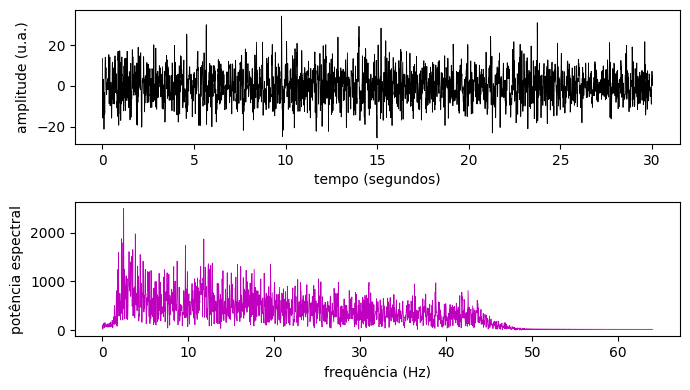

In [99]:
# calculando FFT 
freq, F = transforma_sinal(t,olhos_abertos,dt)
# plotando as figuras
ax = plota_sinal_transformada(t,olhos_abertos,freq,F)

Repare que o espectro para estes dados (reais) é muito ruidoso. Para lidar com este tipo de dado, aplicaremos um método que permite reduzir o ruído na estimativa do espectro (às custas de uma perda na resolução em frequência), chamado de Método de Welch.

### Método de Welch

Para esta parte, precisaremos do seguinte pacote:

In [100]:
from scipy import signal

Vamos agora calular o espectro pelo método de Welch, utilizando a função `signal.welch` do pacote _Scipy_. Precisamos passar dois parâmetros: o sinal que queremos decompor e sua taxa de amostragem (frequência de aquisição). A função `welch` também retorna uma lista com as frequências resultantes do método, e este segundo parâmetro faz com estejam na unidade de medida correta (Hz). Para não confundirmos com a lista de frequências obtida para FFT acima, vamos chamar esta nova lista de `freqw` (frequências no método Welch).

In [101]:
# calculando o espectro pelo método de Welch
freq_aquisicao = 128    # quantidade de pontos medidos por segundo
freqw, densidade_aberto = signal.welch(olhos_abertos, fs=freq_aquisicao)

Agora vamos comparar os resultados dos dois métodos

Text(0, 0.5, 'potência espectral')

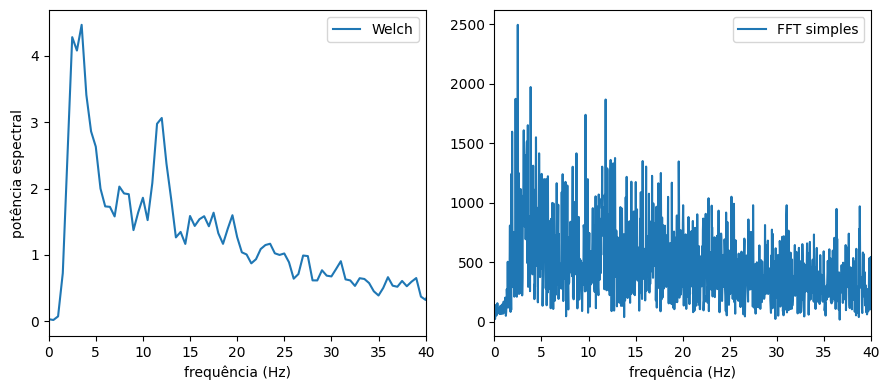

In [102]:
# cria figura com dimensões específicas
fig, ax = plt.subplots(1, 2, figsize=(9,4),dpi=100, tight_layout=True, \
                                sharex=True, squeeze= True)

ax[0].plot(freqw, densidade_aberto,label='Welch')
ax[1].plot(freq,F,label='FFT simples')
ax[0].legend();
ax[1].legend();
ax[0].set_xlim(0,40);
ax[0].set_xlabel('frequência (Hz)')
ax[1].set_xlabel('frequência (Hz)')
ax[0].set_ylabel('potência espectral')

A primeira coisa que podemos reparar é que os dois sinais parecem ter uma mesma forma (desconsiderando a escala do eixo y), mas a curva obtida com o método de Welch é muito mais "lisa", ou seja, apresenta menos ruído. O resultado com FFT "simples" tem uma particularidade, observada no exercício da parte anterior usando sinais ruidosos: apresenta muitos picos espúrios. Podemos pensar o FFT como um método sensível demais para os dados reais, pois acaba amplificando também frequências espúrias. 

O método de Welch também faz uso da FFT, mas separa os dados experimentais em intervalos de tempo e calcula a tranformada em cada um dos trechos. Ao final, é feita uma média dos espectros de cada trecho. Dessa maneira (ignorando diversos detalhes técnicos que saem do escopo da nossa disciplina) o método permite filtrar as frequências espúrias (aquelas decorrentes somente do ruído) daquelas que estão presentes de fato em diversos trechos do sinal.

### Exercício

1. Faça a mesma análise acima para os dados com os olhos fechados. Repare que o arquivo já foi lido e basta repetir a análise usando a lista `olhos_fechados`, ou seja, o sinal adquirido enquanto o sujeito estava de olhos fechados. Ao final, plote as densidades espectrais para os dois sinais (com olhos abertos e fechados) calculada com o método de Welch. Vefique se é possível observar o efeito de que as ondas Alfa (Alpha Waves, de 8 a 12 Hz) são mais proeminentes na ausência de estímulos visuais. Para saber mais sobre a neurociência por trás destes resultados, visite o [site que descreve os dados experimentais](https://zenodo.org/record/2348892#.XswrpRbQ-0k), ou procure por "Alpha Waves eyes closed" na Web. 